In [5]:
import re
from nltk.util import ngrams
import glob
import environment2
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [13]:
for c in ["gini","entropy"]:

  for n in [4]:
    env = environment2.environment2()
    user_list_2D = env.user_list_2D
    user_list_experienced=np.array(['data/NDSI-2D\\taskname_ndsi-2d-task_userid_82316e37-1117-4663-84b4-ddb6455c83b2.csv',
    'data/NDSI-2D\\taskname_ndsi-2d-task_userid_ff56863b-0710-4a58-ad22-4bf2889c9bc0.csv',
    'data/NDSI-2D\\taskname_ndsi-2d-task_userid_bda49380-37ad-41c5-a109-7fa198a7691a.csv',
    'data/NDSI-2D\\taskname_ndsi-2d-task_userid_3abeecbe-327a-441e-be2a-0dd3763c1d45.csv',
    'data/NDSI-2D\\taskname_ndsi-2d-task_userid_6d49fab8-273b-4a91-948b-ecd14556b049.csv',
    'data/NDSI-2D\\taskname_ndsi-2d-task_userid_954edb7c-4eae-47ab-9338-5c5c7eccac2d.csv',
    'data/NDSI-2D\\taskname_ndsi-2d-task_userid_a6aab5f5-fdb6-41df-9fc6-221d70f8c6e8.csv',
    'data/NDSI-2D\\taskname_ndsi-2d-task_userid_8b544d24-3274-4bb0-9719-fd2bccc87b02.csv'])
    user_list_first_time=np.setdiff1d(user_list_2D, user_list_experienced)


     #result_dataframe= pd.DataFrame(columns=['User','ROI_Cycle','SouthEast','South','OhioValley','NorthernRockiesPlains','SouthWest','NorthWest','UpperMidwest','Northeast','West','Other','None'])
    all_dfs=[]
    for u in user_list_experienced:

      df = pd.read_csv(u)
      df=df[df.State !='Answering']
      u=u.lstrip('data/NDSI-2D\\taskname_ndsi-2d-task_')
      #u=u.lstrip('data/NDSI-3D\\taskname_ndsi-3d-task_')
      u=u.rstrip('.csv')
      one_string = ','.join(df['State'].tolist())
      tokens = [re.sub(r'[^a-zA-Z0-9\s]', ' ', token) for token in one_string.split(",") if token != ""]
      output = list(ngrams(tokens, n))
      df = pd.Series(output).value_counts()
      df_last=pd.DataFrame([df])
      df_last["User"]=u
      df_last['Experience']=1
      all_dfs.append(df_last)


    all_user_list_first_time_dfs=[]

    for u in user_list_first_time:

      df = pd.read_csv(u)
      df=df[df.State !='Answering']
      u=u.lstrip('data/NDSI-2D\\taskname_ndsi-2d-task_')
      #u=u.lstrip('data/NDSI-3D\\taskname_ndsi-3d-task_')
      u=u.rstrip('.csv')
      one_string = ','.join(df['State'].tolist())
      tokens = [re.sub(r'[^a-zA-Z0-9\s]', ' ', token) for token in one_string.split(",") if token != ""]
      output = list(ngrams(tokens, n))
      df = pd.Series(output).value_counts()
      df_last=pd.DataFrame([df])
      df_last["User"]=u
      df_last['Experience']=0
      all_user_list_first_time_dfs.append(df_last)

    final_df=pd.concat([pd.concat(all_dfs),pd.concat(all_user_list_first_time_dfs)])
    final_df=final_df.fillna(0)

    final_df.drop(final_df.index)

    column_names = list(final_df.columns.values)
    column_names = [e for e in column_names if e not in ('Experience', 'User')]
    final_df_copy=final_df.drop(['User'], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(final_df_copy[column_names], final_df_copy['Experience'], test_size = 0.33, random_state = 42)
    dtree = DecisionTreeClassifier(criterion=c)
    dtree = dtree.fit(X_train.values,y_train)
    y_pred_en = dtree.predict(X_test)
    print("####################", n, c)
    print('Model accuracy score with criterion Gini: {0:0.4f},'. format(accuracy_score(y_test, y_pred_en)))

#################### 4 gini
Model accuracy score with criterion Gini: 0.7143,
#################### 4 entropy
Model accuracy score with criterion Gini: 0.5714,


C:\Users\Nischal Aryal\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Nischal Aryal\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


C:\Users\Nischal Aryal\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


C:\Users\Nischal Aryal\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Model accuracy score with criterion Gini: 0.5714


In [321]:
cm = confusion_matrix(y_test, y_pred_en)
print('Confusion matrix: tn, fp,fn,tp\n\n', cm.ravel())

Confusion matrix: tn, fp,fn,tp

 [3 1 2 1]


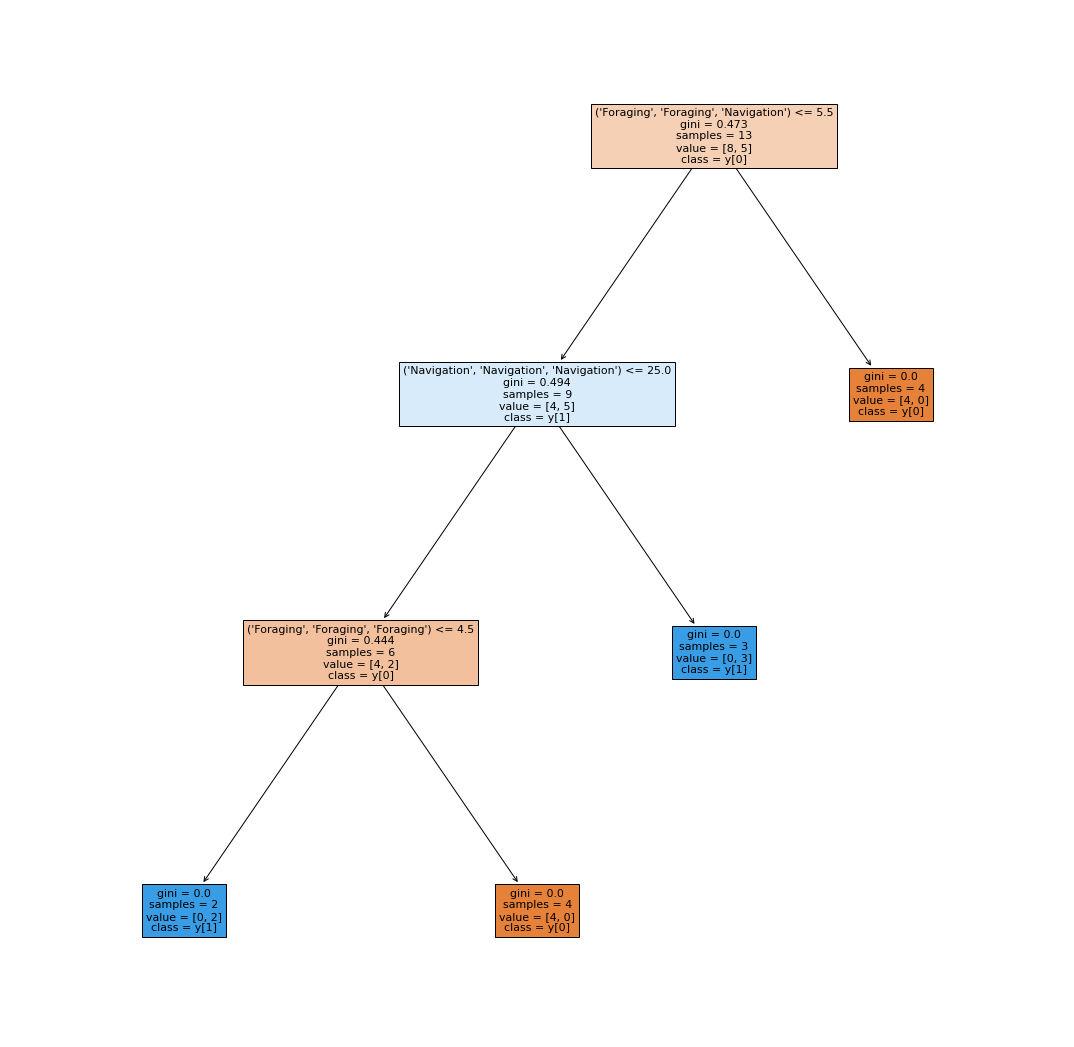

In [322]:
import time
plt.figure(figsize=(19,19))  # set plot size (denoted in inches)
tree.plot_tree(dtree, feature_names=column_names, class_names=True,filled=True, fontsize=11)
filename= "tree" + str(time.time()) + str(".jpg")
plt.savefig(filename,format='jpg',bbox_inches = "tight")
plt.show()